In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics
import seaborn as sns
import env
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy
import acquire
import prepare
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")
# importing my personal wrangle module
import wrangle
import explore

In [2]:
# Acquiring the data using the above module
zillow_sql_query = wrangle.get_zillow_data()
# PLEASE THINK ABOUT ADDING A ZILLOW_COPY TO WORK WITH FROM HERE, THEREBY AVOIDING FUTURE SQL QUERIES
# Code below will have to be updated accordingly.  
zillow = zillow_sql_query.copy()

In [3]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4.0,3.5,3100.0,1023282.0,1998.0,11013.72,6059.0
1,2.0,1.0,1465.0,464000.0,1967.0,5672.48,6111.0
2,3.0,2.0,1243.0,564778.0,1962.0,6488.30,6059.0
3,4.0,3.0,2376.0,145143.0,1970.0,1777.51,6037.0
4,4.0,3.0,2962.0,773303.0,1950.0,9516.26,6037.0


In [4]:
# Using my wrangle module to clean and prep the data. NaNs are dropped; so are outliers. 
# In the end, I added an 'age' column and deleted the yearbuilt column (which was more like a categorical variable)
# No outliers were removed from year built, age, or fips
zillow = wrangle.clean_and_prep_data(zillow)

Consider dropping yearbuilt as a column--this is a categorical and is closely related to age, which will be the feature we use instead.

Consider the k value used removing outliers--there are a couple features that may be better with a different value.  I'm thinking of the 1 bedroom houses, for example.

In [5]:
zillow.head()

,bedrooms,bathrooms,sq_ft,tax_value,county,age,sq_ft_per_bathroom
0,4.0,3.5,3100.0,1023282.0,Orange,23,885.714286
1,2.0,1.0,1465.0,464000.0,Ventura,54,1465.000000
2,3.0,2.0,1243.0,564778.0,Orange,59,621.500000
3,4.0,3.0,2376.0,145143.0,LA,51,792.000000
4,4.0,3.0,2962.0,773303.0,LA,71,987.333333


In [6]:
zillow.shape, zillow_sql_query.shape
# my clean_and_prep function is cutting down the size here, it wasn't me

((44864, 7), (52442, 7))

In [7]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44864 entries, 0 to 52441
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            44864 non-null  float64
 1   bathrooms           44864 non-null  float64
 2   sq_ft               44864 non-null  float64
 3   tax_value           44864 non-null  float64
 4   county              44864 non-null  object 
 5   age                 44864 non-null  int64  
 6   sq_ft_per_bathroom  44864 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [8]:
# checking for null values
zillow.isnull().sum()

bedrooms              0
bathrooms             0
sq_ft                 0
tax_value             0
county                0
age                   0
sq_ft_per_bathroom    0
dtype: int64

In [9]:
# This is a for loop that is checking every column for any white space. there isn't any
# also the NaNs, actually. gone now.
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'county','age']
for col in cols:
    print(zillow[col].value_counts(dropna=False,ascending=True))

5.0     2255
2.0     7981
4.0    12802
3.0    21826
Name: bedrooms, dtype: int64
3.5      422
1.5      832
4.0      960
2.5     3708
1.0     8846
3.0     9108
2.0    20988
Name: bathrooms, dtype: int64
552.0       1
3202.0      1
468.0       1
3498.0      1
3493.0      1
         ... 
1040.0     84
936.0      86
1080.0    100
1200.0    116
1120.0    127
Name: sq_ft, Length: 2905, dtype: int64
134063.0     1
651170.0     1
509145.0     1
474661.0     1
437595.0     1
            ..
550000.0    23
450000.0    23
500000.0    24
600000.0    30
455000.0    33
Name: tax_value, Length: 32879, dtype: int64
Ventura     3828
Orange     11835
LA         29201
Name: county, dtype: int64
127       1
143       1
141       1
124       1
139       1
5         2
134       2
122       2
133       3
128       3
123       5
136       5
125       5
131       6
121       9
119      11
126      12
120      13
117      15
118      17
105      32
6        33
114      36
104      37
87       41
88       42
103 

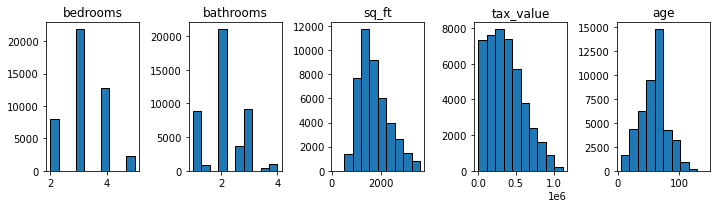

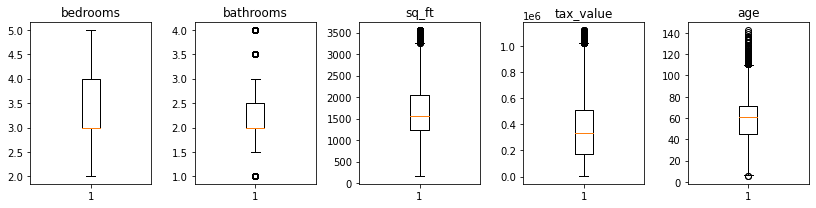

In [10]:
# Here, we create a for loop that makes a histogram for every column. This is the start of my univariate analysis

plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms','sq_ft','tax_value', 'age']
# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,8, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    zillow[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()
    
,

plt.figure(figsize=(16, 3))

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,7, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    plt.boxplot(zillow[col])
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()

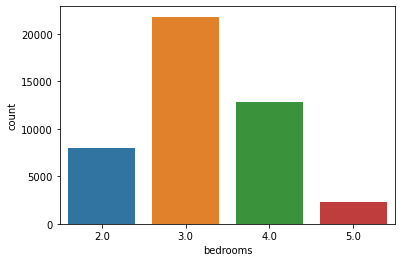

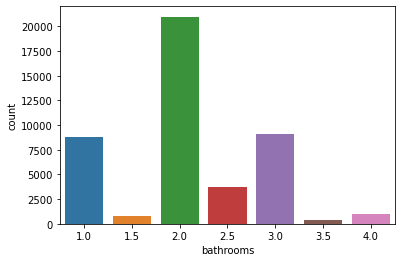

In [11]:
disc_vars = ['bedrooms','bathrooms']
for var in disc_vars:
    plt.figure()
    sns.countplot(x=var,data=zillow)

In [12]:
# Describe was displaying with scientific notation, so I rounded to 2 places.  
round(zillow.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
bedrooms,44864.0,3.21,0.79,2.0,3.0,3.0,4.0,5.0
bathrooms,44864.0,2.09,0.72,1.0,2.0,2.0,2.5,4.0
sq_ft,44864.0,1694.01,605.61,152.0,1238.0,1568.0,2050.0,3566.0
tax_value,44864.0,363580.89,233629.59,1000.0,171473.0,331368.0,511394.0,1122409.0
age,44864.0,58.98,21.62,5.0,45.0,61.0,71.0,143.0
sq_ft_per_bathroom,44864.0,840.16,227.00,76.0,683.0,803.0,955.0,3438.0


### Notice the minimum bedrooms is 2.  I'm sure there were some useful one bedrooms before I removed the outliers.
### The minimum of 1 square foot isn't correct and should be addressed after arriving at MVP.  However, see the problems i was having figuring that out below.  moving on 
### These are homes around in Los Angeles, Ventura, and Orange County, CA

## Next steps: encode columns and split
### Encode the following:
- ['bedroomcnt','bathroomcnt','fips'] .... on second thought, only encode fips
- I will not use the yearbuilt in the final analysis, and instead use age, which is almost the same thing for my purposes.

In [13]:
encoded = wrangle.encode_zillow(zillow)
encoded.head()

,bedrooms,bathrooms,sq_ft,tax_value,county,age,sq_ft_per_bathroom,LA,Orange,Ventura
0,4.0,3.5,3100.0,1023282.0,Orange,23,885.714286,0,1,0
1,2.0,1.0,1465.0,464000.0,Ventura,54,1465.000000,0,0,1
2,3.0,2.0,1243.0,564778.0,Orange,59,621.500000,0,1,0
3,4.0,3.0,2376.0,145143.0,LA,51,792.000000,1,0,0
4,4.0,3.0,2962.0,773303.0,LA,71,987.333333,1,0,0


# SPLITTING

In [14]:
train, validate, test,X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.split_zillow(encoded)
train.shape, validate.shape, test.shape,X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

((25123, 10),
 (10768, 10),
 (8973, 10),
 (25123, 9),
 (25123, 1),
 (10768, 9),
 (10768, 1),
 (8973, 9),
 (8973, 1))

# SCALING
### I've done it in this order so I can explore different data sets as is appropriate

In [15]:
train_scaled, validate_scaled, test_scaled, X_train_scaled, y_train_scaled, X_validate_scaled, y_validate_scaled, X_test_scaled, y_test_scaled = wrangle.scale_zillow(train,validate,test)
train_scaled, validate_scaled, test_scaled, X_train_scaled, y_train_scaled, X_validate_scaled, y_validate_scaled, X_test_scaled, y_test_scaled

ValueError: could not convert string to float: 'LA'

# DATA EXPLORATION--BIVARIATE AND MULTIVARIATE

## I decided to rely on an unencoded version of the data set for some of my visual exploration.

In [ ]:
train.head(1)

In [ ]:
sns.barplot(x=train.county, y=train.tax_value)

In [ ]:
sns.barplot(x=train.bedrooms, y=train.tax_value)

In [ ]:
sns.barplot(x=train.bathrooms, y=train.tax_value)

### There are definitely some houses with too many bathrooms.

In [ ]:
train.head()

In [ ]:
train_corr = train.corr()
train_corr

In [ ]:
sns.heatmap(train_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(train_corr))

### I'd like to show the relationship betwwn sq_ft and bathrooms, and maybe create a feature called bathrooms/sq_ft or something like that

In [ ]:
sns.boxplot(x='bathrooms', y='sq_ft', data=train)

In [ ]:
train.bathrooms.value_counts()

In [ ]:
baths_2 = train[train.bathrooms == 2.00].sq_ft
baths_1 = train[train.bathrooms == 1.00].sq_ft
baths_3 = train[train.bathrooms == 3.00].sq_ft
baths_2_5 = train[train.bathrooms == 2.50].sq_ft
baths_4 = train[train.bathrooms == 4.00].sq_ft
baths_1_5 = train[train.bathrooms == 1.50].sq_ft
baths_3_5 = train[train.bathrooms == 3.50].sq_ft

In [ ]:
baths_list = [baths_2, baths_1, baths_3, baths_2_5,baths_4,baths_1_5,baths_3_5]#, 'baths_3', 'baths_2_5','baths_4','baths_1_5','baths_3_5','baths_1_75']

for bath in baths_list:
    plt.figure
    bath.hist();

In [ ]:
# check variances
for bath in baths_list:
    print(bath.var())
    
# they differ

Set Hypothesis
- 𝐻0 : Population means of sq_ft (by bathrooms) counts are equal
- 𝐻𝑎 : Population means of sq_ft (by bathrooms) are not all equal

In [ ]:
f, p = stats.f_oneway(baths_2, baths_1, baths_3, baths_2_5,baths_4,baths_1_5,baths_3_5)
f, p

In [ ]:
alpha = 0.05
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

In [ ]:
train.head()

In [ ]:
train.columns

In [ ]:
sns.pairplot(data=train,corner=True, hue='county')

In [ ]:
# I can really pop that line color if I want.

sns.lmplot(x='age', y="sq_ft", data=train, line_kws={'color': 'red'}, scatter_kws={'alpha':.3})
plt.show()

### Newer homes are larger

In [ ]:
train.head()

In [ ]:
# This cell will take a long time to run but provide lots of good vizes
# Run it with plenty of time
vars = ['sq_ft','tax_value', 'age','sq_ft_per_bathroom']
vars2 = ['sq_ft','tax_value', 'age','sq_ft_per_bathroom']

for var in vars:
    for var2 in vars2:
        plt.figure
        sns.lmplot(x=var, y=var2, data=train, scatter_kws={'alpha':.2},hue='county')#line_kws={'color': 'red'},

### Takeaways:

- Age doesn't affect tax_value so much in LA county--next step: different model for LA county?

- Sq_ft definitely affects tax_value

- Sq_ft_per_bathroom make a much smaller difference re: tax value in LA county; 

- Sq_ft_per_bathroom has a much bigger relationship to age in LA county (as age goes up, so does sfpb).  Are these historic homes that are valued more highly? --> note that older homes do not depreciate as much here



## Research question number 1: 

Are bigger houses valued higher?

In [ ]:
plt.title('There seems to be a positive correlation between square feet and tax_value')
sns.lineplot(x=train.sq_ft, y=train.tax_value)#,markers=True)


Hypothesis testing: 

    H_o: Square feet and tax_value are not related
    H_a: Square feet and tax_value are related
    
    The null hypothesis is rejected by the stats test

In [ ]:
alpha = 0.05

corr, p = stats.pearsonr(train.sq_ft, train.tax_value)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

### There is a moderate correlation between the variables.

## Question number two: is there a relationship between the sq_ft_per_bathroom and value?

In [ ]:
sns.lmplot(x='sq_ft_per_bathroom',y='tax_value',data=train, hue= 'county',scatter_kws={'alpha':.15})

## Big takeaway: sfpb has very little impact on tax value in LA county, but more in the other two counties.  Strong evidence that two models could be handy

### Let's do an 1 tailed t test here to be sure:

Verify Assumptions
Independent Samples. YES! no observations in the LA sample exist in the Orange or Ventura.
Normal Distribution: Basically normal, and huge sample
Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

In [ ]:
train.sample(1)

In [ ]:
LA_sample = train[train.county == 'LA']
# Orange_sample = train[[train.county == 'Orange'].tax_value
# Ventura_sample = train[train.county == 'Ventura'].tax_value
Other_counties_sample = train[train.county != 'LA']

In [ ]:
LA_sample.head()

In [ ]:
plt.title("The counties' tax values are normally distributed")
plt.xlabel("County Bins")
plt.ylabel("Tax Value")
LA_sample.sq_ft_per_bathroom.hist()

In [ ]:
Other_counties_sample.sq_ft_per_bathroom.hist()

In [ ]:
# check variances
LA_sample.sq_ft_per_bathroom.var(),Other_counties_sample.sq_ft_per_bathroom.var()

### Differing variances

Set Hypothesis
- 𝐻0 : In LA county, sfpb does not impact tax value
- 𝐻𝑎 : In LA county, sfpb does impact tax value

In [ ]:
corr_LA, p = stats.pearsonr(LA_sample.sq_ft_per_bathroom,LA_sample.tax_value)
corr_LA, p

In [ ]:
corr_Others, p = stats.pearsonr(Other_counties_sample.sq_ft_per_bathroom,Other_counties_sample.tax_value)
corr_Others, p

### Takeaway: there is a stronger correlation between sfpb in Other counties than in LA

# Feature engineering

In [ ]:
# The data needs to be scaled:

train_scaled, validate_scaled, test_scaled, X_train_scaled, y_train_scaled, X_validate_scaled, y_validate_scaled, X_test_scaled, y_test_scaled = wrangle.scale_zillow(train,validate,test)

In [ ]:
# K Best model here:

from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 8 features
f_selector = SelectKBest(f_regression, k=2)

# find the top 8 X's correlated with y
f_selector.fit(X_train_scaled, y_train)

X_reduced = f_selector.transform(X_train_scaled)

print(X_train_scaled.shape)
print(X_reduced.shape)